In [23]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pickle
import numpy as np
import powerlaw
from collections import Counter
from itertools import combinations, groupby

import statistics
import copy

# Task One

  Use the karateClubDataset used in Laboratory session 1 or downloaded elsewhere https://docs.dgl.ai/en/2.0.x/generated/dgl.data.KarateClubDataset.html

a) Displays the whole graph 

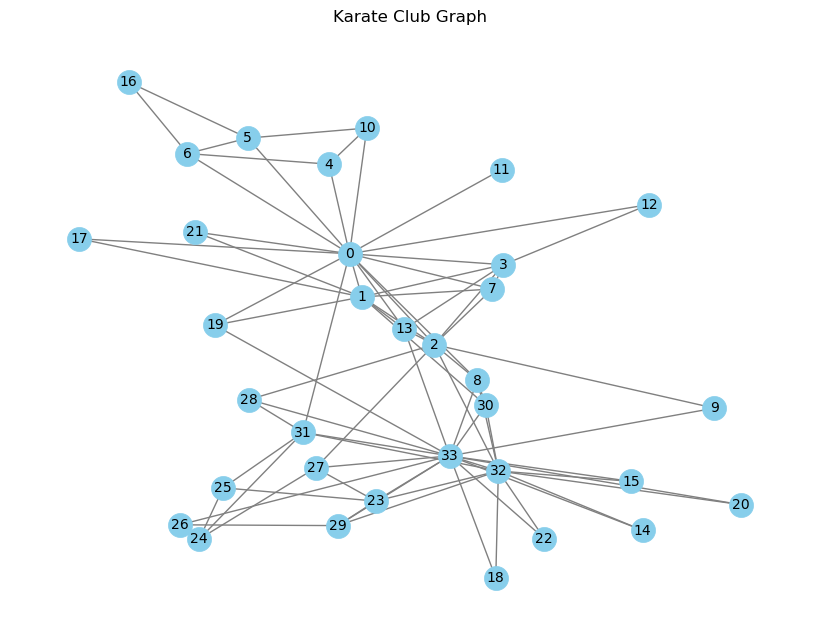

In [2]:
# Create a NetworkX graph
G = nx.karate_club_graph()

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color='gray', linewidths=0.5, font_size=10)
plt.title("Karate Club Graph")
plt.show()

b) Displays the degree centrality, eigenvector centrality, Katz centrality, page rank centrality of each node of the network. Draw the network graph where the node with the highest centrality is highlighted (use different color for each centrality type)

In [12]:
def centrality_calculation(G, directed=False):
    degree_centrality = nx.degree_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)
    katz_centrality = nx.katz_centrality(G, alpha=0.1)
    pagerank_centrality = nx.pagerank(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    
    if directed:
        in_degrees = [G.in_degree(n) for n in G.nodes]
        out_degrees = [G.in_degree(n) for n in G.nodes]
        return zip(degree_centrality.values(),eigenvector_centrality.values(), katz_centrality.values(), pagerank_centrality.values(), closeness_centrality.values(), betweenness_centrality.values(), in_degrees, out_degrees)
    else:
        degrees = [G.degree(n) for n in G.nodes]
        return zip(degree_centrality.values(),eigenvector_centrality.values(), katz_centrality.values(), pagerank_centrality.values(), closeness_centrality.values(), betweenness_centrality.values(), degrees)

In [4]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Find nodes with the highest and second-highest degree centrality
highest_degree_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:1]
highest_degree_nodes

[33]

In [5]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Find nodes with the highest eigenvector centrality
highest_eigenvector_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:1]
highest_eigenvector_nodes

[33]

In [6]:
# Calculate katz centrality
katz_centrality = nx.katz_centrality(G, alpha=0.1)

# Find nodes with the highest katz centrality
highest_katz_nodes = sorted(katz_centrality, key=katz_centrality.get, reverse=True)[:1]
highest_katz_nodes

[33]

In [7]:
# Calculate pagerank centrality
pagerank_centrality = nx.pagerank(G)

# Find nodes with the highest pagerank centrality
highest_pagerank_nodes = sorted(pagerank_centrality, key=pagerank_centrality.get, reverse=True)[:1]
highest_pagerank_nodes

[33]

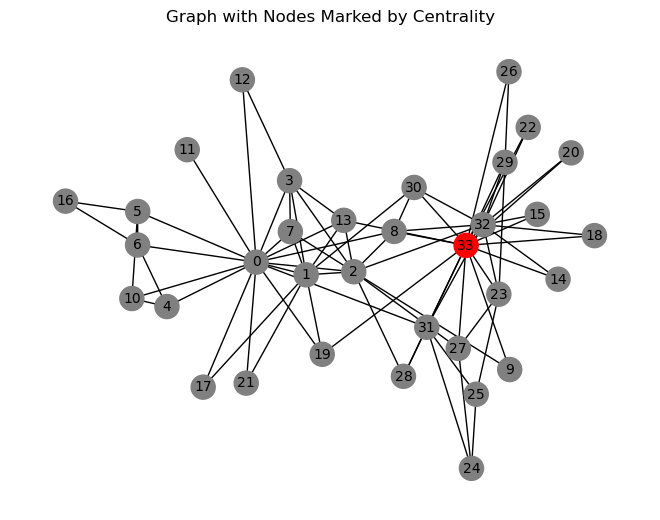

In [8]:
# Create a color map for the nodes
node_colors = []
for node in G.nodes():
    if node in highest_degree_nodes:
        node_colors.append('red')
    elif node in highest_eigenvector_nodes:
        node_colors.append('blue')  
    elif node in highest_katz_nodes:
        node_colors.append('darkgreen')
    elif node in highest_pagerank_nodes:
        node_colors.append('orange')
    else:
        node_colors.append('grey') # Default color for other nodes

# Draw the graph with nodes colored accordingly
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=300, font_size=10)
plt.title("Graph with Nodes Marked by Centrality")
plt.show()

c) Draws the distribution (histogram) for each centrality measure

d) Repeat b) and c) when using closeness centrality, betweenness centrality 

In [13]:
def plot_hist_centrality(G):  
    degree_centrality = [item[0] for item in centrality_calculation(G)]
    fig1, ax1 = plt.subplots()
    ax1.hist(degree_centrality)
    ax1.set_xlabel('Degree Centrality')
    ax1.set_ylabel('Nodes')
    ax1.set_title(r'Histogram of Degree Centrality')
    fig1.tight_layout()
    plt.show()
    
    eigenvector_centrality = [item[1] for item in centrality_calculation(G)]
    fig2, ax2 = plt.subplots()
    ax2.hist(eigenvector_centrality)
    ax2.set_xlabel('eigenvector Centrality')
    ax2.set_ylabel('Nodes')
    ax2.set_title(r'Histogram of eigenvector Centrality')
    fig2.tight_layout()
    plt.show()
    
    katz_centrality = [item[2] for item in centrality_calculation(G)]
    fig3, ax3 = plt.subplots()
    ax3.hist(katz_centrality)
    ax3.set_xlabel('Katz Centrality')
    ax3.set_ylabel('Nodes')
    ax3.set_title(r'Histogram of Katz Centrality')
    fig3.tight_layout()
    plt.show()
    
    pagerank_centrality = [item[3] for item in centrality_calculation(G)]
    fig4, ax4 = plt.subplots()
    ax4.hist(pagerank_centrality)
    ax4.set_xlabel('Pagerank Centrality')
    ax4.set_ylabel('Nodes')
    ax4.set_title(r'Histogram of Pagerank Centrality')
    fig4.tight_layout()
    plt.show()
    
    closeness_centrality = [item[3] for item in centrality_calculation(G)]
    fig5, ax5 = plt.subplots()
    ax5.hist(closeness_centrality)
    ax5.set_xlabel('Closeness Centrality')
    ax5.set_ylabel('Nodes')
    ax5.set_title(r'Histogram of Closeness Centrality')
    fig5.tight_layout()
    plt.show()
    
    betweenness_centrality = [item[3] for item in centrality_calculation(G)]
    fig6, ax6 = plt.subplots()
    ax6.hist(betweenness_centrality)
    ax6.set_xlabel('Betweenness Centrality')
    ax6.set_ylabel('Nodes')
    ax6.set_title(r'Histogram of Betweenness Centrality')
    fig5.tight_layout()
    plt.show()

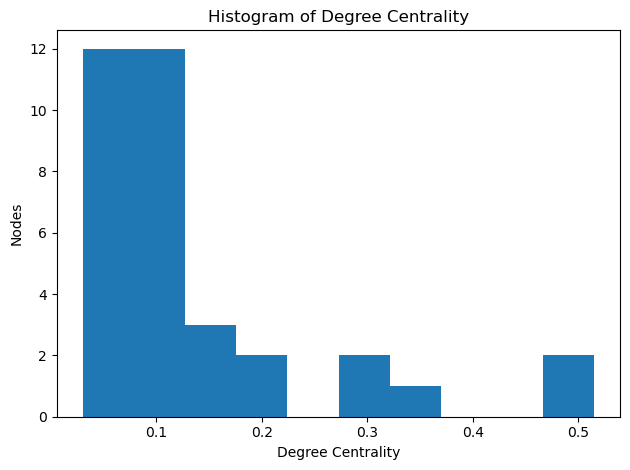

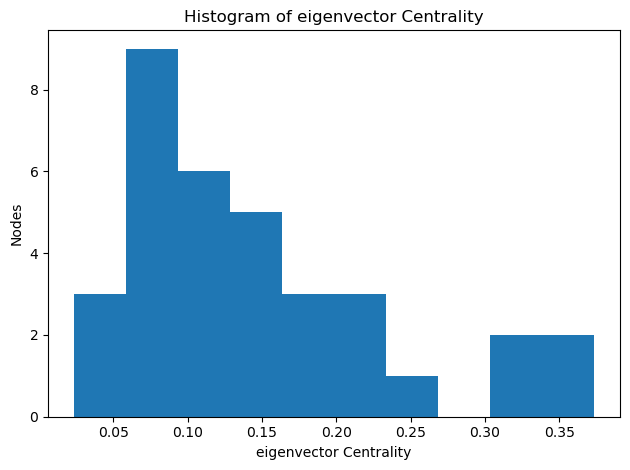

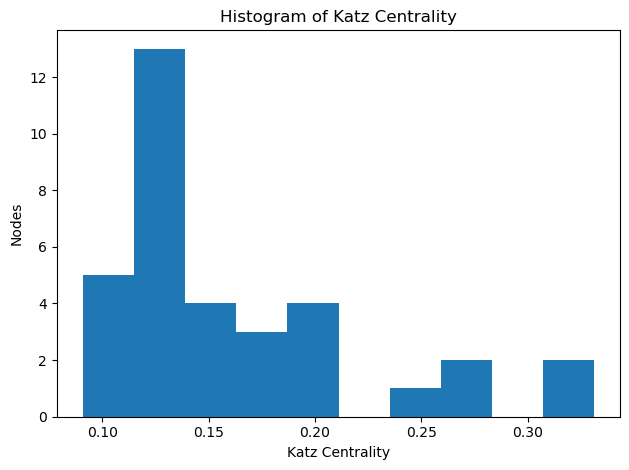

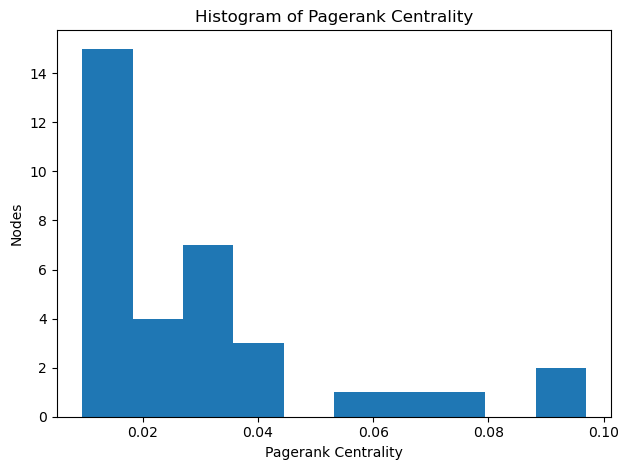

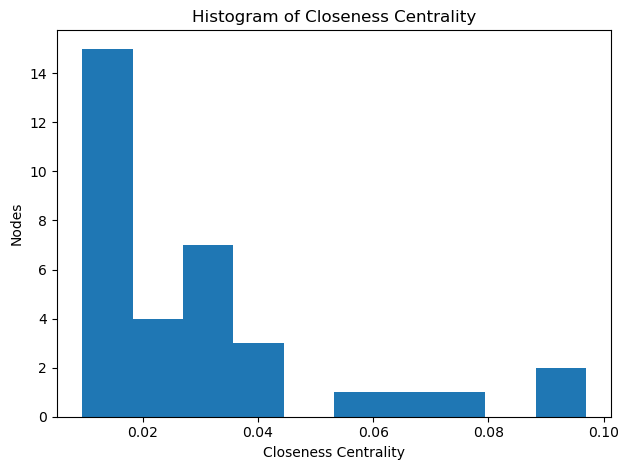

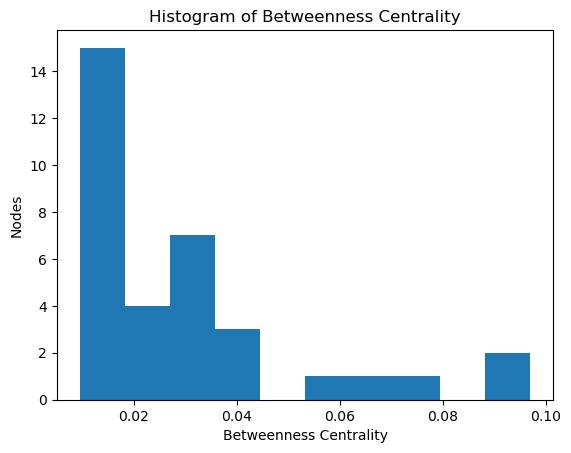

In [14]:
plot_hist_centrality(G)

e) Displays the local clustering coefficient of each node, and draws the corresponding distribution function. Then compare possible link between clustering coefficient values and some centrality measures when scrutinizing the values of clustering coefficient/centrality measures of individual nodes.

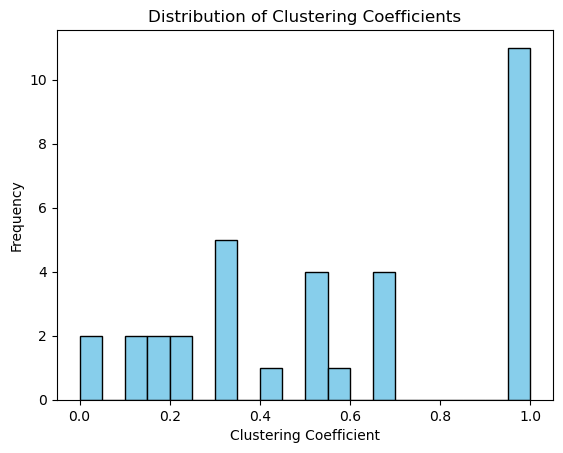

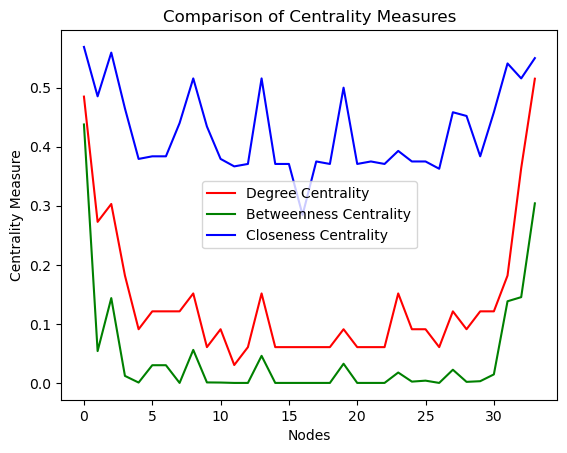

In [19]:
# Calculate the local clustering coefficient of each node
clustering_coefficients = nx.clustering(G)

# Draw the distribution of clustering coefficients
plt.hist(list(clustering_coefficients.values()), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Clustering Coefficients')
plt.show()

# Compare clustering coefficient with centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Plot clustering coefficient vs centrality measures
plt.plot(list(degree_centrality.keys()), list(degree_centrality.values()), color='red', label='Degree Centrality')
plt.plot(list(betweenness_centrality.keys()), list(betweenness_centrality.values()), color='green', label='Betweenness Centrality')
plt.plot(list(clustering_coefficients.keys()), list(closeness_centrality.values()), color='blue', label='Closeness Centrality')
plt.xlabel('Nodes')
plt.ylabel('Centrality Measure')
plt.title('Comparison of Centrality Measures')
plt.legend()
plt.show()


f) Calculates the global clustering coefficient of the overall graph (or its largest connected componenty). 

In [20]:
# Calculate the global clustering coefficient of the overall graph
global_clustering_coefficient = nx.average_clustering(G)

print("Global clustering coefficient of the overall graph:", global_clustering_coefficient)

Global clustering coefficient of the overall graph: 0.5706384782076823


In [21]:
# If you want to calculate the global clustering coefficient of the largest connected component:
largest_cc = max(nx.connected_components(G), key=len)
largest_cc_graph = G.subgraph(largest_cc)
largest_cc_clustering_coefficient = nx.average_clustering(largest_cc_graph)

print("Global clustering coefficient of the largest connected component:", largest_cc_clustering_coefficient)

Global clustering coefficient of the largest connected component: 0.5706384782076823


g) Identify smallest subgraph that has a global clustering coefficient close to the one of the whole graph.  

h) Identify a subgraph, which is bipartie graph 

In [27]:
# Function to calculate the global clustering coefficient
def get_global_clustering_coefficient(graph):
    return nx.average_clustering(graph)

def bipartiteGraph(graph):
    
    # Check if the subgraph is bipartite
    if nx.is_bipartite(subgraph):
        print("The identified subgraph is a bipartite graph.")
    else:
        print("No bipartite subgraph found.")

# Assuming you have already created a graph G (e.g., from the ego-Facebook dataset)

# Calculate the global clustering coefficient of the whole graph
original_global_clustering_coefficient = get_global_clustering_coefficient(G)

# Create a copy of the original graph
subgraph = copy.deepcopy(G)

# Iteratively remove nodes and recalculate the clustering coefficient
while len(subgraph) > 2:
    subgraph_nodes = list(subgraph.nodes())
    for node in subgraph_nodes:
        subgraph_copy = copy.deepcopy(subgraph)
        subgraph_copy.remove_node(node)
        clustering_coefficient = get_global_clustering_coefficient(subgraph_copy)
        if abs(clustering_coefficient - original_global_clustering_coefficient) <= 0.01:
            print("Smallest subgraph found:")
            print("Number of nodes:", len(subgraph_copy))
            bipartiteGraph(subgraph_copy)
            print("Global clustering coefficient:", clustering_coefficient)
            break
    subgraph = subgraph_copy
    

Smallest subgraph found:
Number of nodes: 33
No bipartite subgraph found.
Global clustering coefficient: 0.5677390791027156
Smallest subgraph found:
Number of nodes: 32
No bipartite subgraph found.
Global clustering coefficient: 0.5803641670829172
Smallest subgraph found:
Number of nodes: 31
No bipartite subgraph found.
Global clustering coefficient: 0.5660122135928589
Smallest subgraph found:
Number of nodes: 30
No bipartite subgraph found.
Global clustering coefficient: 0.5619733044733046
Smallest subgraph found:
Number of nodes: 29
No bipartite subgraph found.
Global clustering coefficient: 0.5641103149723841
Smallest subgraph found:
Number of nodes: 28
No bipartite subgraph found.
Global clustering coefficient: 0.5609887136672851
Smallest subgraph found:
Number of nodes: 27
No bipartite subgraph found.
Global clustering coefficient: 0.5728715728715729
Smallest subgraph found:
Number of nodes: 26
No bipartite subgraph found.
Global clustering coefficient: 0.5666999666999667
Smallest

# Task Two

Consider the eggo-Facebook dataset, available at https://snap.stanford.edu/data/ego-Facebook.html. 

This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

Facebook data has been anonymized by replacing the Facebook-internal ids for each user with a new value. Also, while feature vectors from this dataset have been provided, the interpretation of those features has been obscured. For instance, where the original dataset may have contained a feature "political=Democratic Party", the new data would simply contain "political=anonymized feature 1". Thus, using the anonymized data it is possible to determine whether two users have the same political affiliations, but not what their individual political affiliations represent. 

Files:

* nodeId.edges : The edges in the ego network for the node 'nodeId'. Edges are undirected for facebook, and directed (a follows b) for twitter and gplus. The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.

* nodeId.circles : The set of circles for the ego node. Each line contains one circle, consisting of a series of node ids. The first entry in each line is the name of the circle.

* nodeId.feat : The features for each of the nodes that appears in the edge file.

* nodeId.egofeat : The features for the ego user.

* nodeId.featnames : The names of each of the feature dimensions. Features are '1' if the user has this property in their profile, and '0' otherwise. This file has been anonymized for facebook users, since the names of the features would reveal private data.

Write a program that:

a) Calculates the degree, closeness and in-betweeness centrality of each node of the network, and displays the corresponding distribution (histogram)

In [41]:
def plot_graph(G):
    nx.draw(G,pos=nx.spring_layout(G),node_color='maroon', node_size=20, edge_color="gray", width=0.5)
    plt.show()

In [42]:
def read_circles(file_path):
    with open(file_path) as f :
        content = f.readlines()
        content = [line.replace("\n","") for line in content]
        content = [line.split("\t") for line in content]
    return {circle[0]:list(map(int,circle[1:])) for circle in content} # Convert nodes to int and add to dict.

In [43]:
def centrality_calculation(G, directed=False):
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    
    if directed:
        in_degrees = [G.in_degree(n) for n in G.nodes]
        out_degrees = [G.in_degree(n) for n in G.nodes]
        return zip(degree_centrality.values(),closeness_centrality.values(), betweenness_centrality.values(), in_degrees, out_degrees)
    else:
        degrees = [G.degree(n) for n in G.nodes]
        return zip(degree_centrality.values(),closeness_centrality.values(), betweenness_centrality.values(), degrees)

In [49]:
def plot_hist_centrality(G):  
    degree_centrality = [item[0] for item in centrality_calculation(G)]
    fig1, ax1 = plt.subplots()
    ax1.hist(degree_centrality)
    ax1.set_xlabel('Degree Centrality')
    ax1.set_ylabel('Nodes')
    ax1.set_title(r'Histogram of Degree Centrality')
    fig1.tight_layout()
    plt.show()
    
    closeness_centrality = [item[1] for item in centrality_calculation(G)]
    fig2, ax2 = plt.subplots()
    ax2.hist(closeness_centrality)
    ax2.set_xlabel('Closeness Centrality')
    ax2.set_ylabel('Nodes')
    ax2.set_title(r'Histogram of Closeness Centrality')
    fig2.tight_layout()
    plt.show()
    
    betweenness_centrality = [item[2] for item in centrality_calculation(G)]
    fig3, ax3 = plt.subplots()
    ax3.hist(betweenness_centrality)
    ax3.set_xlabel('Betweenness Centrality')
    ax3.set_ylabel('Nodes')
    ax3.set_title(r'Histogram of Betweenness Centrality')
    fig3.tight_layout()
    plt.show()

In [50]:
def clusters(G):
    try:
        diameter = nx.algorithms.distance_measures.diameter(G)
    except:
        diameter = "Found infinite path length because the graph is not connected !"
    clustering_coefficient = nx.algorithms.approximation.clustering_coefficient.average_clustering(G)
    number_of_nodes = G.number_of_edges()
    number_of_edges = G.number_of_nodes()
    number_of_connected_components = nx.number_connected_components(G)
    largest_connected_component = max([ len(i) for i in list(nx.connected_components(G))])
    print("##### Clusters #####")
    print("Diameter : ",diameter)
    print("Number of Nodes : ",number_of_nodes)
    print("Number of Edges : ",number_of_edges)
    print("Number of Connected Components : ",number_of_connected_components)
    print("Size of the Largest Connected Compopnent : ",largest_connected_component)

In [51]:
G = nx.read_edgelist('facebook/0.edges', nodetype=int)

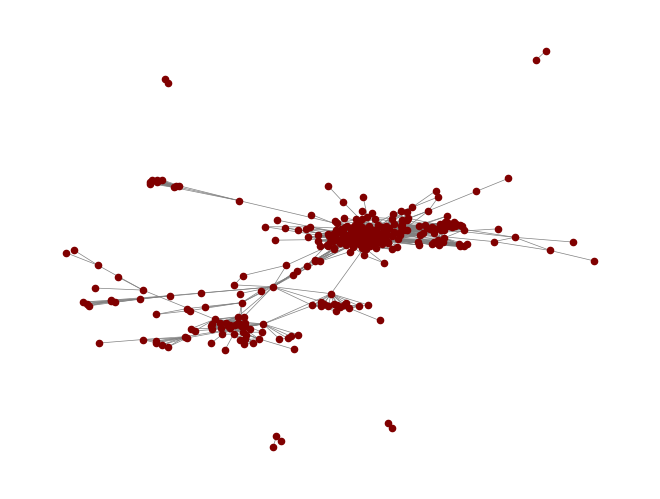

In [52]:
plot_graph(G)

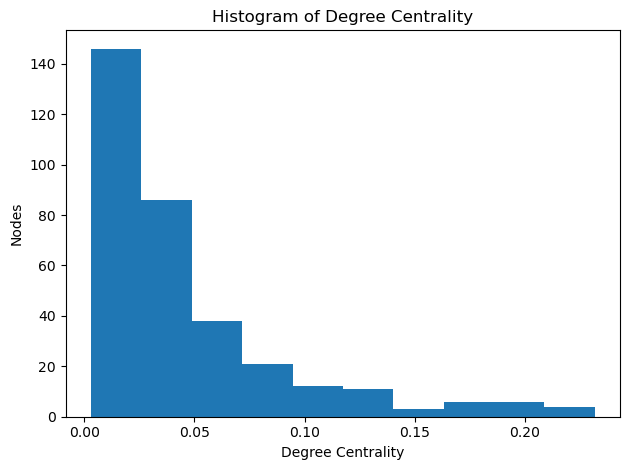

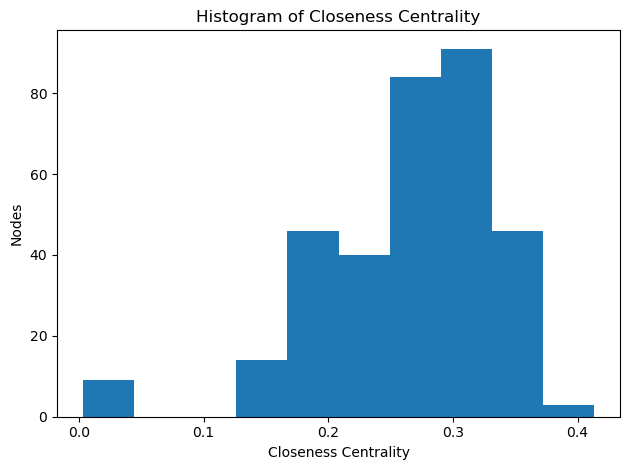

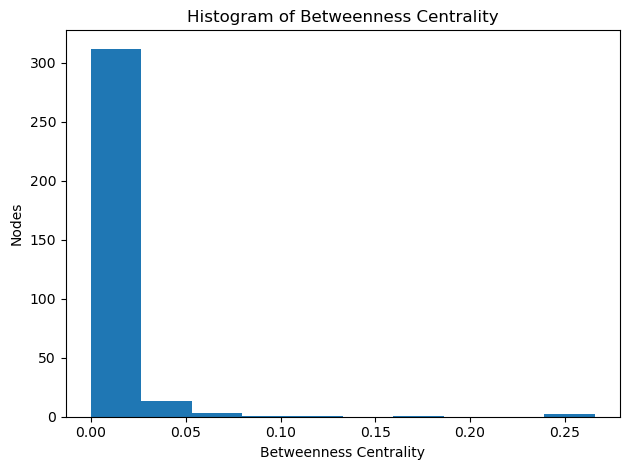

In [53]:
plot_hist_centrality(G)

In [54]:
clusters(G)

##### Clusters #####
Diameter :  Found infinite path length because the graph is not connected !
Number of Nodes :  2519
Number of Edges :  333
Number of Connected Components :  5
Size of the Largest Connected Compopnent :  324


In [104]:
circles = read_circles("facebook/0.circles")

In [119]:
def get_circle_network(edgelist, vertices, subgraph):
    """
    ...
    """
    G = nx.Graph()
    if subgraph is not None:
        induced_edges = [ edge for edge in edgelist if ((edge[0] in subgraph) and (edge[1] in subgraph))]
        G.add_nodes_from(subgraph)
        G.add_edges_from(induced_edges, nodetype=int)
    else :
        G.add_nodes_from(vertices)
        G.add_edges_from(edgelist, nodetype=int)
    
    
    nx.draw(G,pos=nx.spring_layout(G),node_color='maroon', node_size=20,edge_color="gray", width=0.5)
    plt.show()


 CIRCLE0 



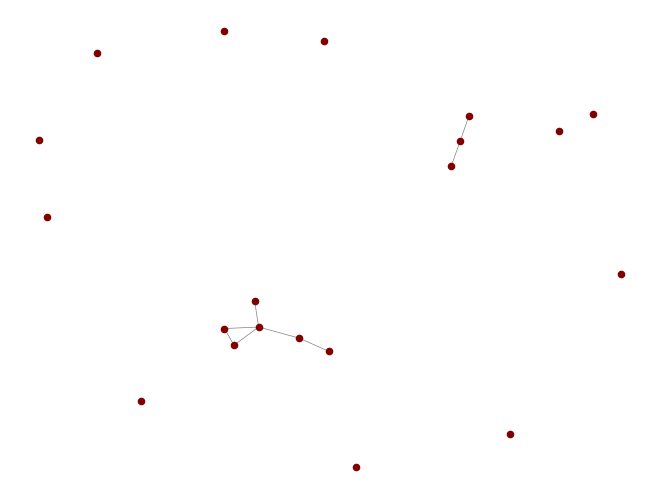


 CIRCLE1 



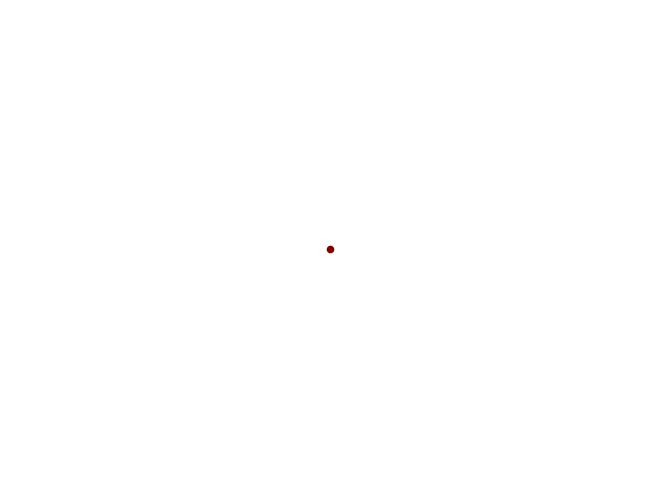


 CIRCLE2 



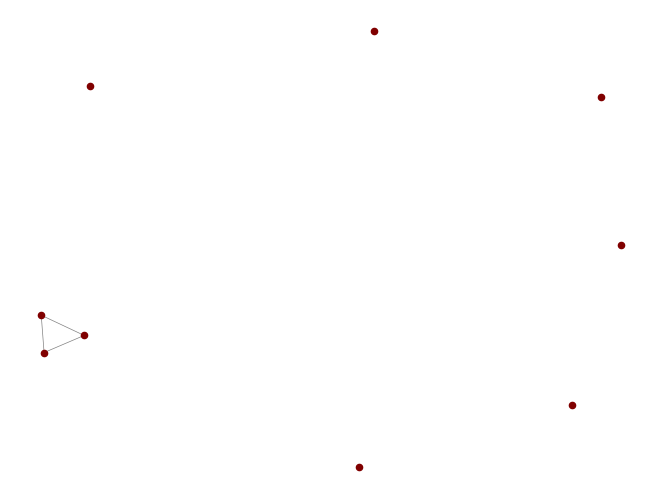


 CIRCLE3 



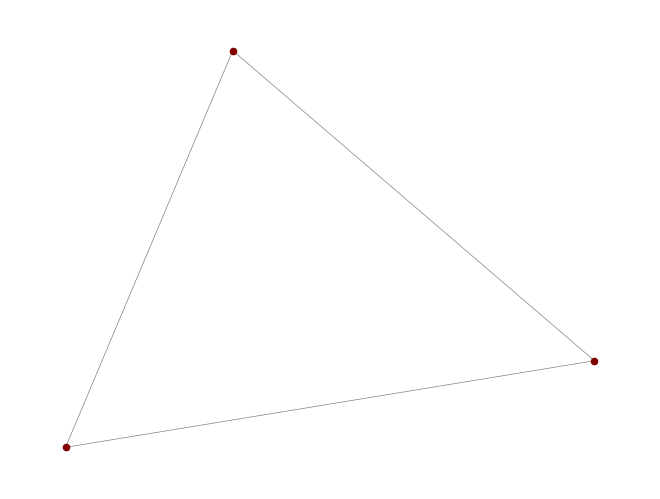


 CIRCLE4 



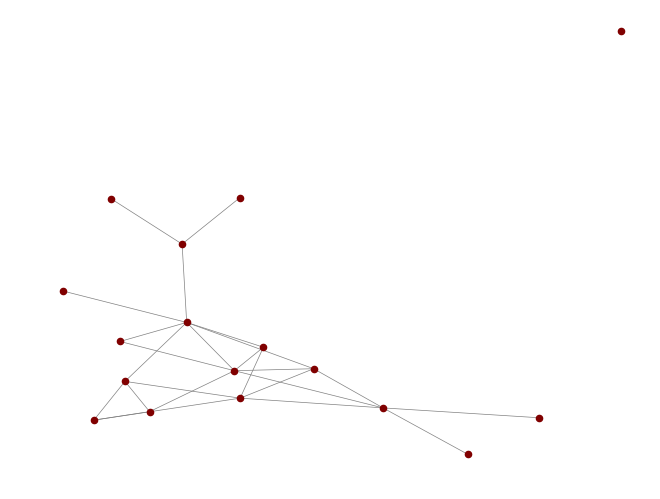


 CIRCLE5 



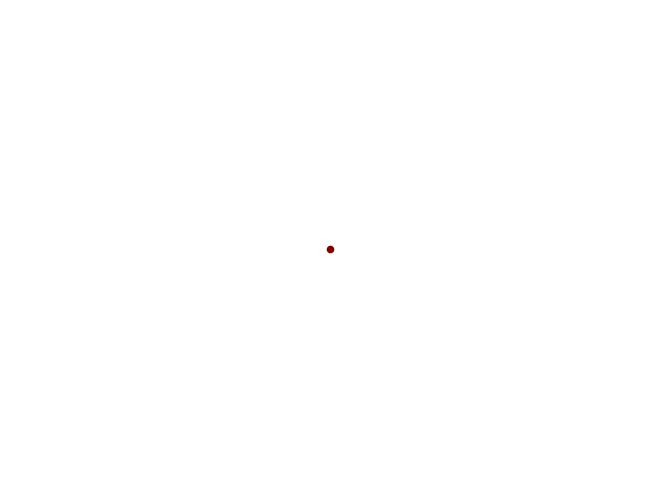


 CIRCLE6 



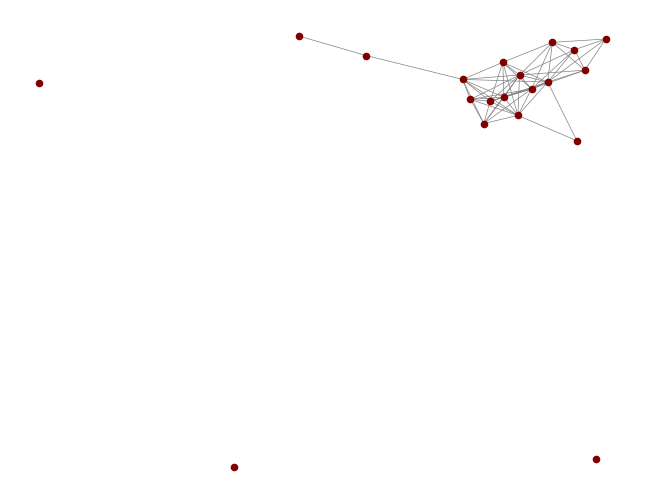


 CIRCLE7 



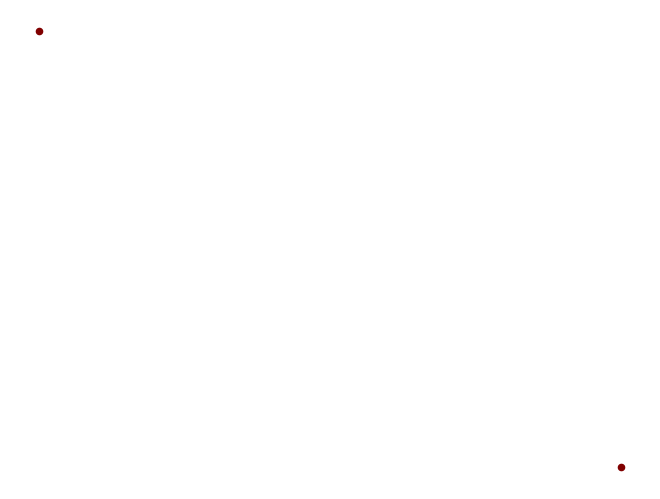


 CIRCLE8 



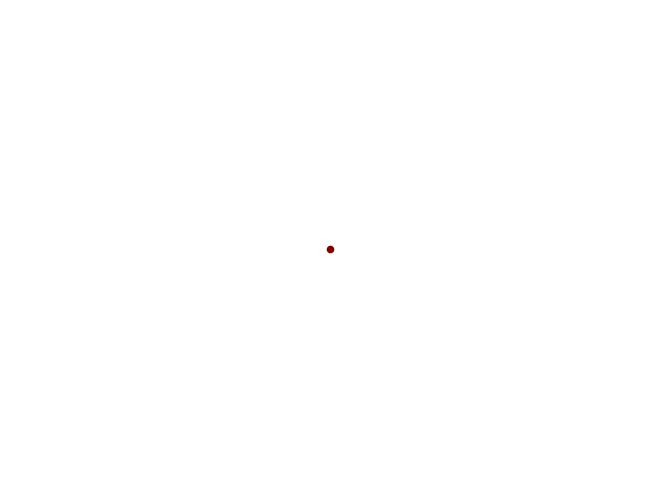


 CIRCLE9 



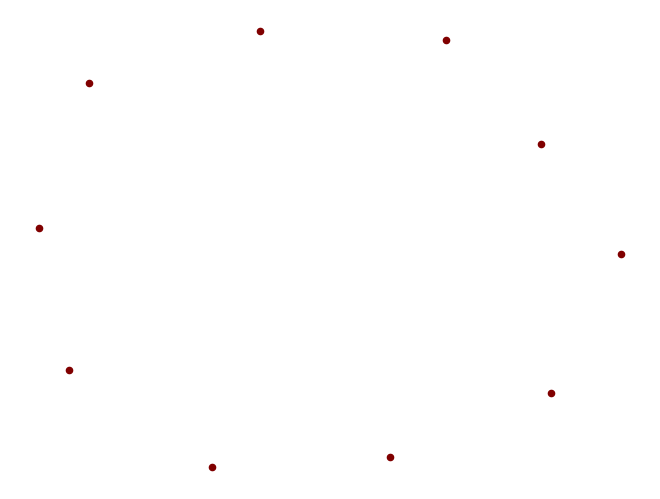


 CIRCLE10 



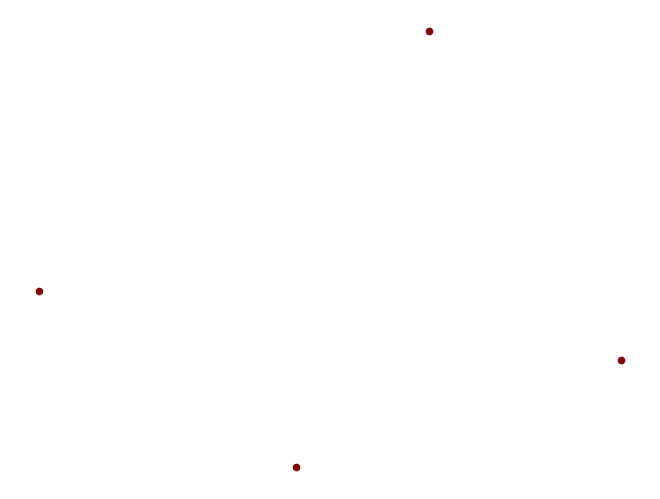


 CIRCLE11 



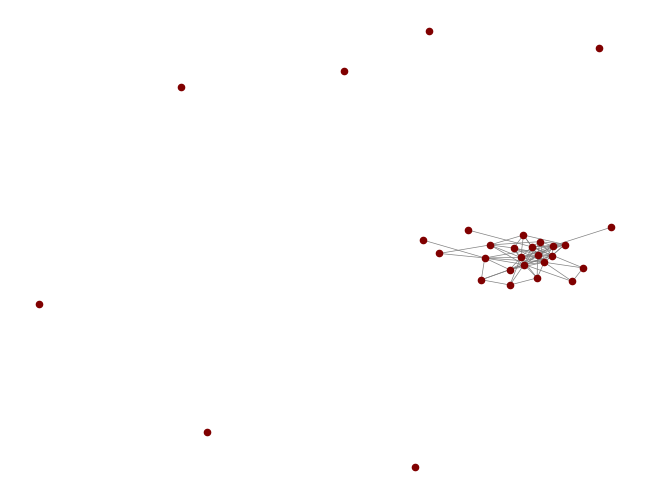


 CIRCLE12 



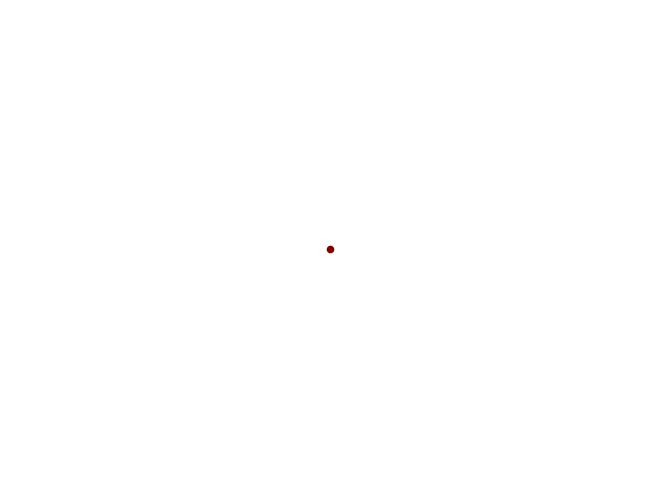


 CIRCLE13 



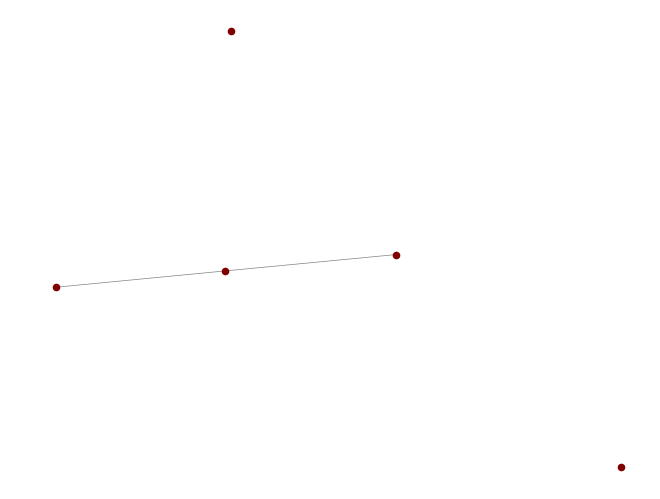


 CIRCLE14 



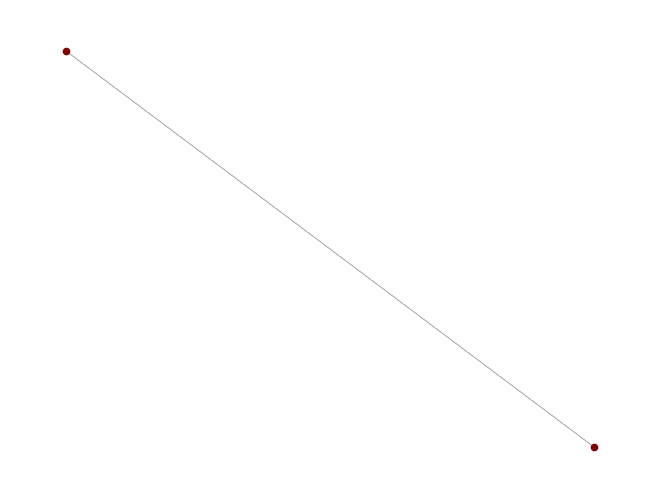


 CIRCLE15 



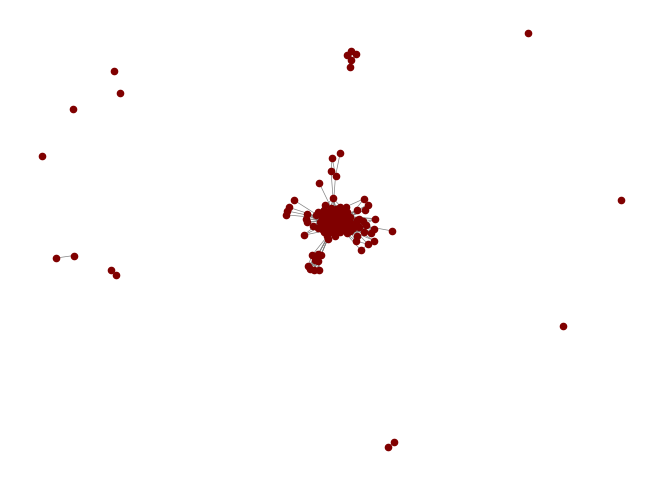


 CIRCLE16 



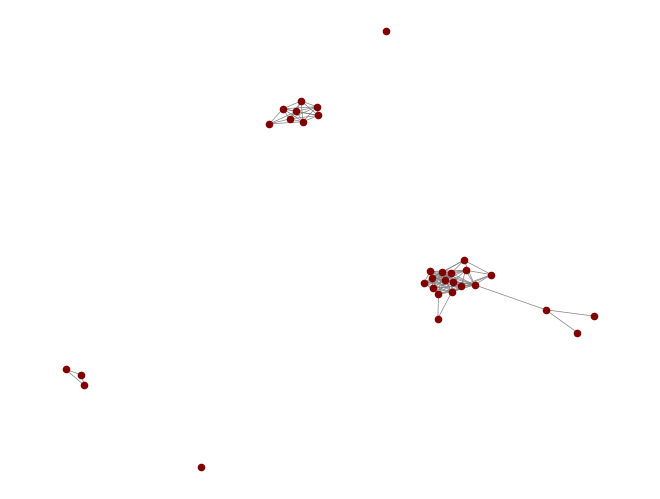


 CIRCLE17 



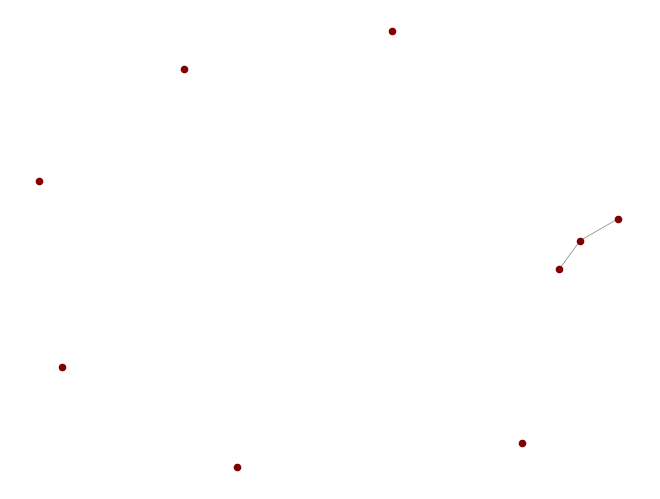


 CIRCLE18 



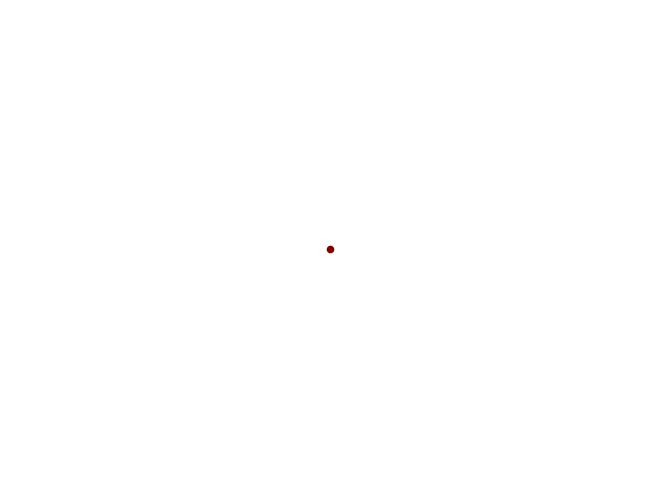


 CIRCLE19 



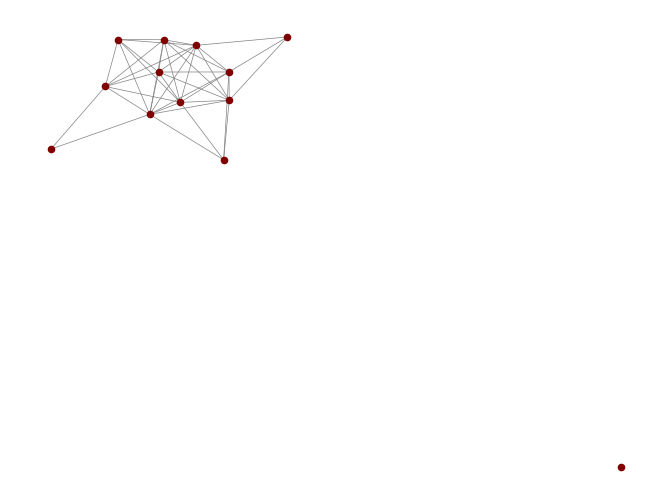


 CIRCLE20 



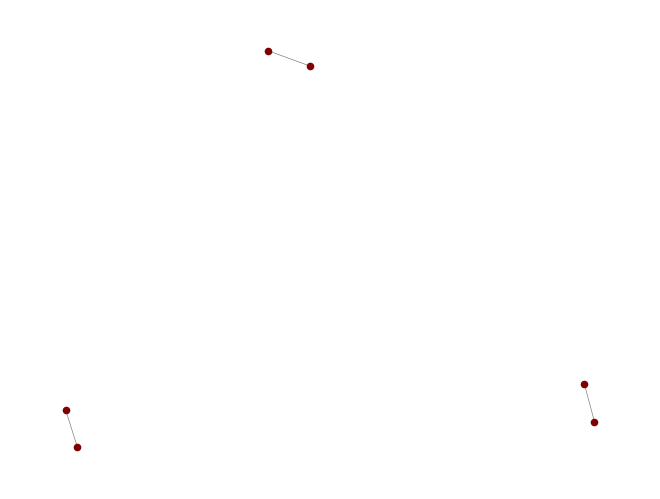


 CIRCLE21 



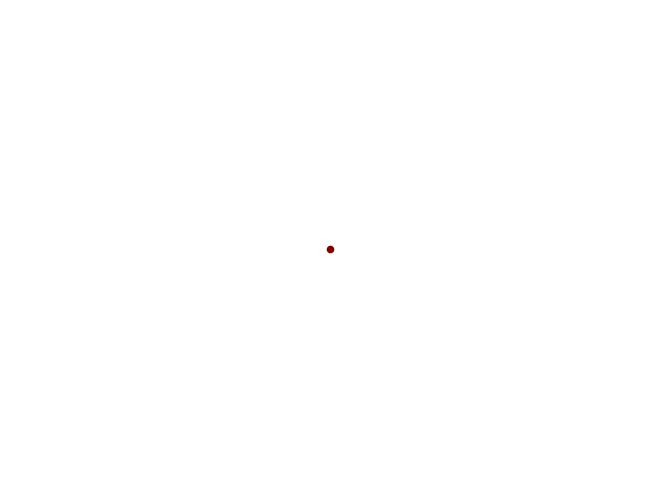


 CIRCLE22 



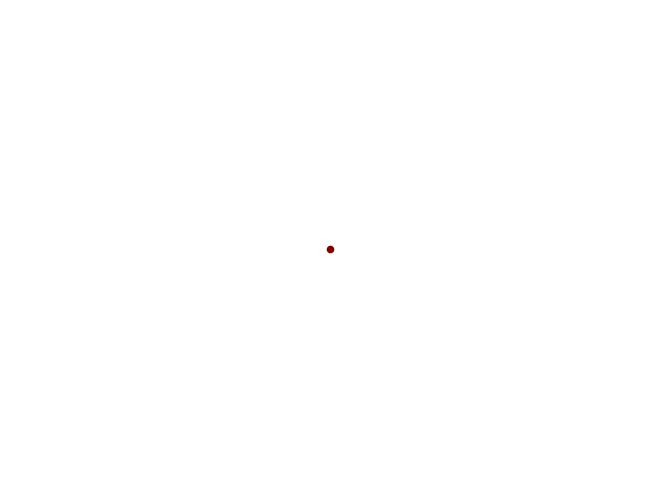


 CIRCLE23 



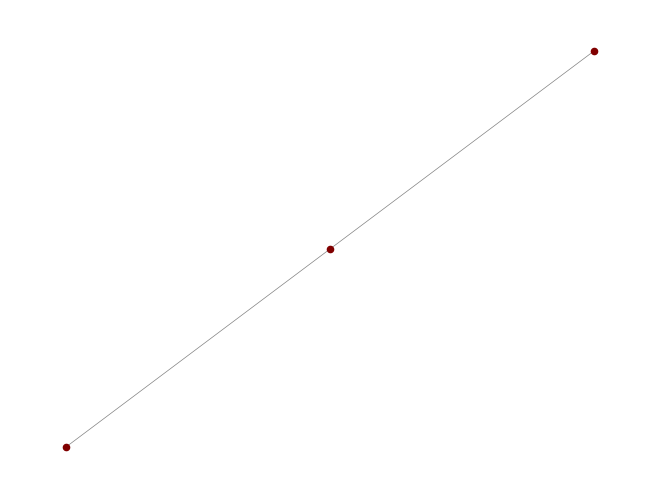

In [123]:
for c in circles:
    print("\n",c.upper(),"\n")
    get_circle_network(edgelist = list(G.edges()), vertices=list(G.nodes()),subgraph=circles[c])

In [38]:
G_combined = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

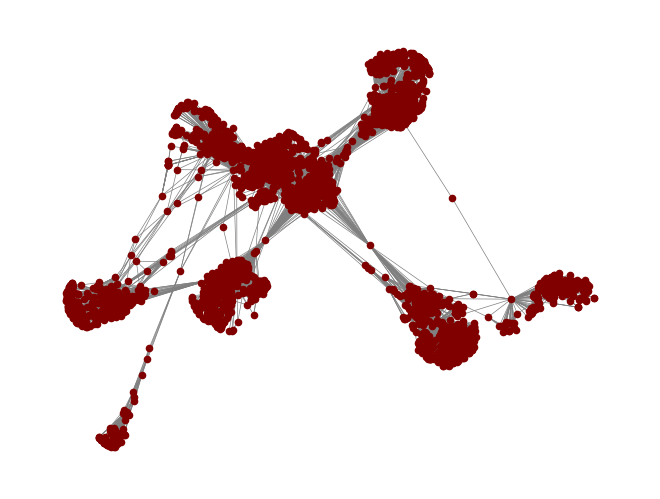

In [49]:
plot_graph(G_combined)

In [42]:
def degrees_of_separation(G, max_iter = 1000):
    shortest_paths = []
    for _ in range(max_iter):
        rand_two = random.sample(list(G.nodes), 2)
        shortest_paths.append(nx.shortest_path_length(G,rand_two[0], rand_two[1]))
    fig, ax = plt.subplots()
    ax.hist(shortest_paths, color = "orange")
    ax.set_xlabel('Lengths')
    ax.set_ylabel('Shortest Path')
    ax.set_title('The Distribution of the 1000 Shortest Path Lengths')
    plt.show()
    print("\nMean : ",statistics.mean(shortest_paths))

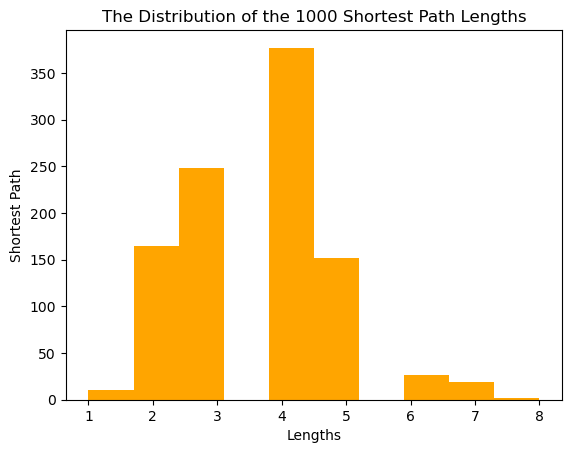


Mean :  3.663


In [43]:
degrees_of_separation(G_combined)

b) Calculates the shortest distance between node (s) of highest centrality score and node (s) of second highest centrality score (for both degree, closeness, in-betweeness centraility measures)

In [64]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Find nodes with the highest and second-highest degree centrality
# More than one nodes have
highest_degree_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:1]
second_highest_degree_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[1:2]

# Calculate shortest paths between nodes of highest and second-highest degree centrality
shortest_paths_degree = []
for node1 in highest_degree_nodes:
    for node2 in second_highest_degree_nodes:
        shortest_paths_degree.append(nx.shortest_path_length(G, node1, node2))

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Find nodes with the highest and second-highest closeness centrality
highest_closeness_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:1]
second_highest_closeness_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[1:2]

# Calculate shortest paths between nodes of highest and second-highest closeness centrality
shortest_paths_closeness = []
for node1 in highest_closeness_nodes:
    for node2 in second_highest_closeness_nodes:
        shortest_paths_closeness.append(nx.shortest_path_length(G, node1, node2))

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Find nodes with the highest and second-highest betweenness centrality
highest_betweenness_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:1]
second_highest_betweenness_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[1:2]

# Calculate shortest paths between nodes of highest and second-highest betweenness centrality
shortest_paths_betweenness = []
for node1 in highest_betweenness_nodes:
    for node2 in second_highest_betweenness_nodes:
        shortest_paths_betweenness.append(nx.shortest_path_length(G, node1, node2))

# Print shortest distances
print("Shortest distances for degree centrality:", shortest_paths_degree)
print("Shortest distances for closeness centrality:", shortest_paths_closeness)
print("Shortest distances for betweenness centrality:", shortest_paths_betweenness)


Shortest distances for degree centrality: [1]
Shortest distances for closeness centrality: [1]
Shortest distances for betweenness centrality: [1]


c) Displays the subgraph where the nodes are most connected (in terms of degree centrality).. Can use your own reasoning for this issue

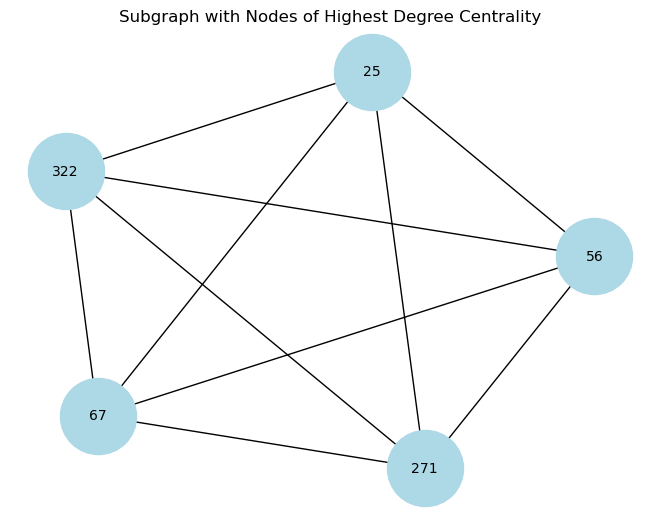

In [65]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Find nodes with the highest degree centrality
highest_degree_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]  # Adjust the number of nodes as needed

# Extract the subgraph containing the highest degree nodes and their neighbors
subgraph = G.subgraph(highest_degree_nodes)

# Draw the subgraph
pos = nx.spring_layout(subgraph)  # Positioning nodes using the spring layout algorithm
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10)
plt.title("Subgraph with Nodes of Highest Degree Centrality")
plt.show()


d) Calculates the local clustering coefficients and the shortest distance among the nodes with highest and second highest clustering coefficient.

In [66]:
# Calculate local clustering coefficients
clustering_coefficients = nx.clustering(G)

# Find nodes with the highest and second-highest clustering coefficients
highest_clustering_nodes = sorted(clustering_coefficients, key=clustering_coefficients.get, reverse=True)[:1]
second_highest_clustering_nodes = sorted(clustering_coefficients, key=clustering_coefficients.get, reverse=True)[1:2]

# Calculate shortest paths between nodes of highest and second-highest clustering coefficients
shortest_paths_clustering = []
for node1 in highest_clustering_nodes:
    for node2 in second_highest_clustering_nodes:
        shortest_paths_clustering.append(nx.shortest_path_length(G, node1, node2))

# Print clustering coefficients
print("Clustering coefficient for highest clustering node:", clustering_coefficients[highest_clustering_nodes[0]])
print("Clustering coefficient for second highest clustering node:", clustering_coefficients[second_highest_clustering_nodes[0]])

# Print shortest distances
print("Shortest distances for highest and second-highest clustering nodes:", shortest_paths_clustering)


Clustering coefficient for highest clustering node: 1.0
Clustering coefficient for second highest clustering node: 1.0
Shortest distances for highest and second-highest clustering nodes: [5]


e) Checks whether Power-law distribution is fitted

Calculating best minimal value for power law fit
Power-law fit results:
   alpha = 2.5997905949181854
   x_min = 13.0
   D = 0.07465574213987436


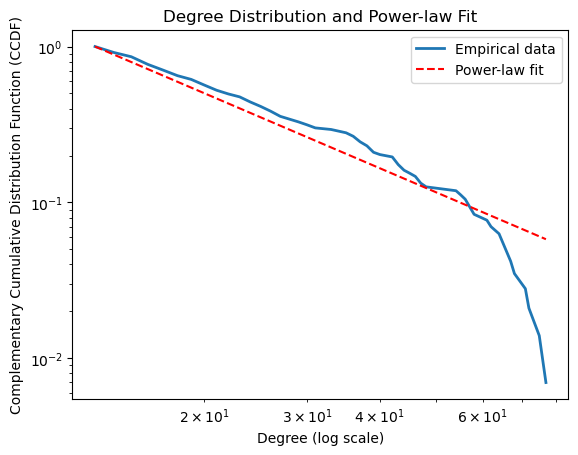

In [67]:
# Calculate the degree distribution
degree_sequence = [d for n, d in G.degree()]

# Fit a power-law model to the degree distribution
fit = powerlaw.Fit(degree_sequence)

# Perform goodness-of-fit tests
print("Power-law fit results:")
print(f"   alpha = {fit.alpha}")
print(f"   x_min = {fit.xmin}")
print(f"   D = {fit.D}")

# Plot the degree distribution and the fitted power-law model
fig = fit.plot_ccdf(linewidth=2, label='Empirical data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power-law fit')
plt.xlabel('Degree (log scale)')
plt.ylabel('Complementary Cumulative Distribution Function (CCDF)')
plt.legend()
plt.title('Degree Distribution and Power-law Fit')
plt.xscale('log')
plt.yscale('log')
plt.show()

In summary, the output you provided indicates that:

* The estimated exponent (α) of the power-law distribution is approximately 2.60.
* The minimum value (x_min) at which the power-law behavior is observed is 13.0.
* The Kolmogorov-Smirnov (KS) statistic (D) is 0.0747, suggesting a relatively good fit between the empirical data and the fitted power-law model.